<a href="https://colab.research.google.com/github/Dhruvish44/Analyze-a-Large-Dataset-of-Fraud-in-Financial-Payment-Services/blob/main/Analyze_a_Large_Dataset_of_Fraud_in_Financial_Payment_Services.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Column Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']
First 5 rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  

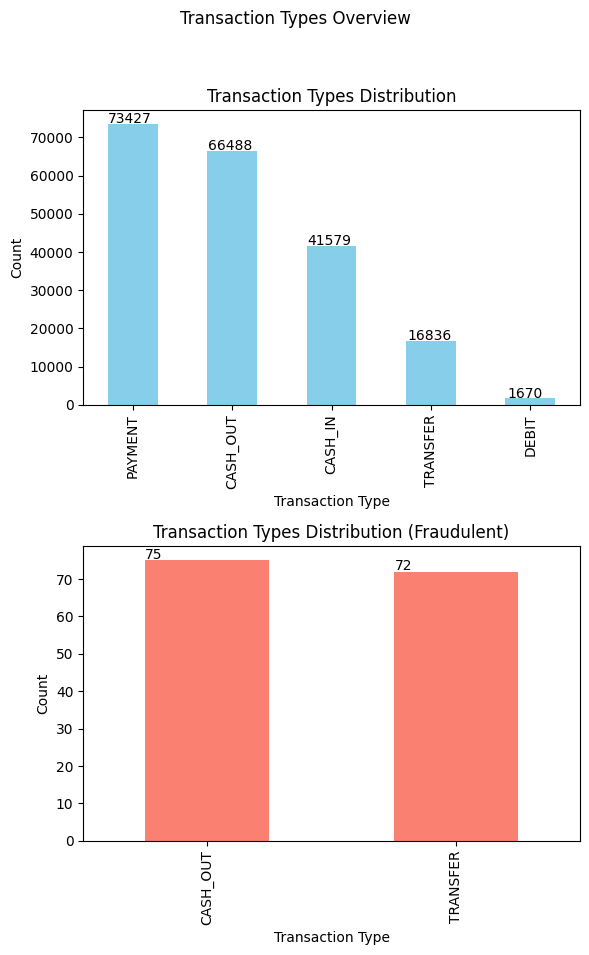

These charts show the distribution of transaction types, with a specific focus on fraudulent transactions.


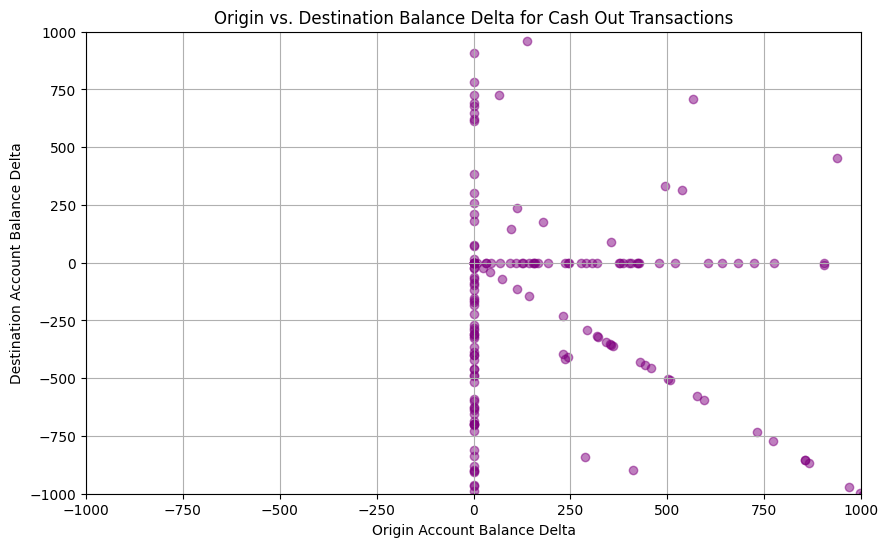

This scatter plot visualizes the changes in balances for origin and destination accounts during Cash Out transactions.
Custom Exercise Result:
 type
CASH_IN     16487
CASH_OUT    18072
DEBIT        1483
PAYMENT     73427
TRANSFER     8155
Name: nameDest, dtype: int64


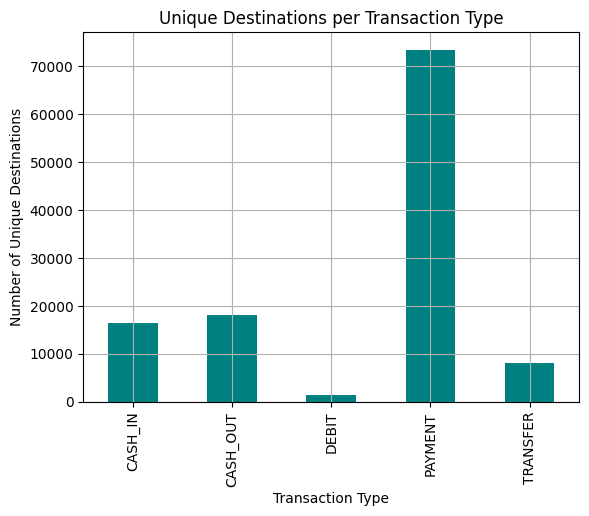

This bar chart displays the number of unique destinations for each transaction type, providing insights into the distribution of destinations across different transaction types.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Exercise functions

def exercise_0(file):
    df = pd.read_csv(file)
    return df

def exercise_1(df):
    return df.columns.tolist()

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(k)

def exercise_4(df):
    return df['type'].unique().tolist()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    return df.groupby('nameOrig')['nameDest'].nunique().sort_values(ascending=False)

# Visualization functions

def visual_1(df):
    transaction_counts = df['type'].value_counts()
    transaction_counts_split_by_fraud = df[df['isFraud'] == 1]['type'].value_counts()

    fig, axs = plt.subplots(2, figsize=(6,10))

    transaction_counts.plot(ax=axs[0], kind='bar', color='skyblue')
    axs[0].set_title('Transaction Types Distribution')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Count')

    transaction_counts_split_by_fraud.plot(ax=axs[1], kind='bar', color='salmon')
    axs[1].set_title('Transaction Types Distribution (Fraudulent)')
    axs[1].set_xlabel('Transaction Type')
    axs[1].set_ylabel('Count')

    fig.suptitle('Transaction Types Overview')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])

    for ax in axs:
        for p in ax.patches:
            ax.annotate(int(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.show()
    return 'These charts show the distribution of transaction types, with a specific focus on fraudulent transactions.'

def visual_2(df):
    cash_out_transactions = df[df['type'] == 'CASH_OUT']

    plt.figure(figsize=(10, 6))
    plt.scatter(cash_out_transactions['oldbalanceOrg'] - cash_out_transactions['newbalanceOrig'],
                cash_out_transactions['oldbalanceDest'] - cash_out_transactions['newbalanceDest'],
                alpha=0.5, c='purple')

    plt.title('Origin vs. Destination Balance Delta for Cash Out Transactions')
    plt.xlabel('Origin Account Balance Delta')
    plt.ylabel('Destination Account Balance Delta')
    plt.xlim(-1e3, 1e3)
    plt.ylim(-1e3, 1e3)
    plt.grid(True)

    plt.show()
    return 'This scatter plot visualizes the changes in balances for origin and destination accounts during Cash Out transactions.'

def exercise_custom(df):
    # Example: Return a list of unique destinations for each transaction type
    return df.groupby('type')['nameDest'].nunique()

def visual_custom(df):
    unique_destinations = exercise_custom(df)

    unique_destinations.plot(kind='bar', color='teal')
    plt.title('Unique Destinations per Transaction Type')
    plt.xlabel('Transaction Type')
    plt.ylabel('Number of Unique Destinations')
    plt.grid(True)

    plt.show()
    return 'This bar chart displays the number of unique destinations for each transaction type, providing insights into the distribution of destinations across different transaction types.'

# Load the dataset
df = exercise_0('transactions.csv')

# Test each exercise

# Exercise 1: Return column names
columns = exercise_1(df)
print('Column Names:', columns)

# Exercise 2: Return first k rows
first_k_rows = exercise_2(df, 5)
print('First 5 rows:\n', first_k_rows)

# Exercise 3: Return a random sample of k rows
random_sample = exercise_3(df, 5)
print('Random sample of 5 rows:\n', random_sample)

# Exercise 4: Return unique transaction types
unique_transaction_types = exercise_4(df)
print('Unique Transaction Types:', unique_transaction_types)

# Exercise 5: Return top 10 transaction destinations with frequencies
top_10_destinations = exercise_5(df)
print('Top 10 Transaction Destinations:\n', top_10_destinations)

# Exercise 6: Return rows where fraud was detected
fraud_rows = exercise_6(df)
print('Rows where fraud was detected:\n', fraud_rows)

# Exercise 7: Bonus: Return number of distinct destinations per source
distinct_destinations = exercise_7(df)
print('Distinct destinations per source:\n', distinct_destinations)

# Visual 1: Transaction types bar chart and fraud split
description_visual_1 = visual_1(df)
print(description_visual_1)

# Visual 2: Scatter plot for Cash Out transactions
description_visual_2 = visual_2(df)
print(description_visual_2)

# Custom Exercise and Visualization
custom_exercise_result = exercise_custom(df)
print('Custom Exercise Result:\n', custom_exercise_result)

description_visual_custom = visual_custom(df)
print(description_visual_custom)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def exercise_0(file):
    return pd.read_csv(file)

def exercise_1(df):
    return list(df)

def exercise_2(df, k):
    return df.head(k)

def exercise_3(df, k):
    return df.sample(n=k)

def exercise_4(df):
    return df['type'].unique()

def exercise_5(df):
    return df['nameDest'].value_counts().head(10)

def exercise_6(df):
    return df[df['isFraud'] == 1]

def exercise_7(df):
    df1 = df.groupby('nameOrig')['nameDest'].agg(['nunique'])
    df1.sort_values(by=('nunique'), ascending=False, inplace=True)
    return df1

In [ ]:
df = exercise_0('transactions.csv')

In [ ]:
# Test exercises here
exercise_1(df)
exercise_2(df, 5)
exercise_3(df, 5)
exercise_4(df)
exercise_5(df)
exercise_6(df)
print('done!')

done!


'While the transaction frequencies depend on the whims of the available data, what is interesting here is that fraudulent activity is only seen on CASH_OUT and TRANSFER transactions. This insight inform management to focus the effort of manual reviews which could result in less fraud being missed.'

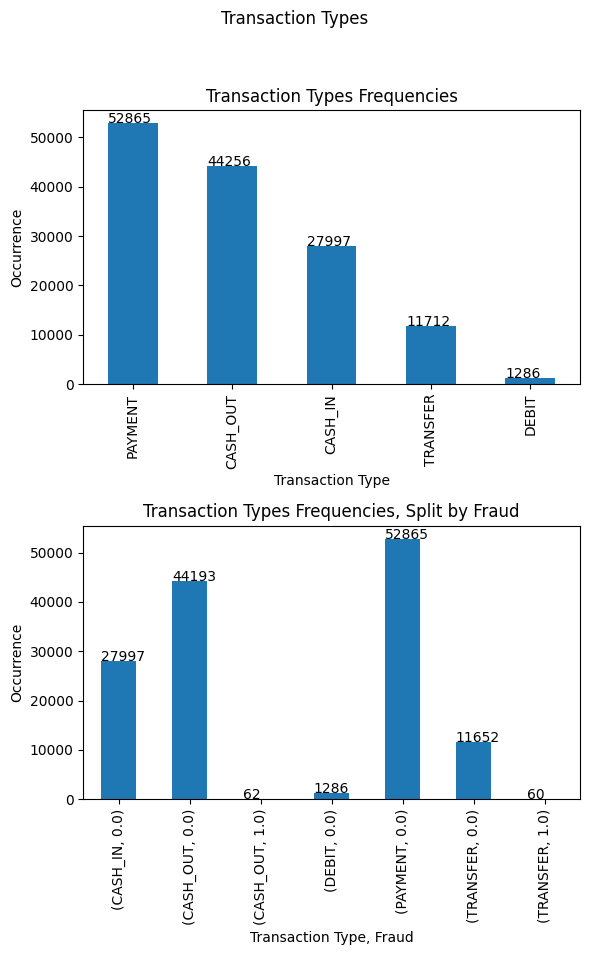

In [ ]:
def visual_1(df):
    def transaction_counts(df):
        return df['type'].value_counts()
    def transaction_counts_split_by_fraud(df):
        return df.groupby(by=['type', 'isFraud']).size()

    fig, axs = plt.subplots(2, figsize=(6,10))
    transaction_counts(df).plot(ax=axs[0], kind='bar')
    axs[0].set_title('Transaction Types Frequencies')
    axs[0].set_xlabel('Transaction Type')
    axs[0].set_ylabel('Occurrence')
    transaction_counts_split_by_fraud(df).plot(ax=axs[1], kind='bar')
    axs[1].set_title('Transaction Types Frequencies, Split by Fraud')
    axs[1].set_xlabel('Transaction Type, Fraud')
    axs[1].set_ylabel('Occurrence')
    fig.suptitle('Transaction Types')
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])
    for ax in axs:
      for p in ax.patches:
          ax.annotate(p.get_height(), (p.get_x(), p.get_height()))
    return 'While the transaction frequencies depend on the whims of the ' \
           'available data, what is interesting here is that fraudulent ' \
           'activity is only seen on CASH_OUT and TRANSFER transactions. '\
           'This insight inform management to focus the effort of manual '\
           'reviews which could result in less fraud being missed.'

visual_1(df)


'A cash out occurs when a partipant withdraws money. It is reassuring that only two of the four quadrants have activity, as the contrary would indicate something wrong with the dataset. The y=-x line is particularly interesting as it indicates instant settlement.'

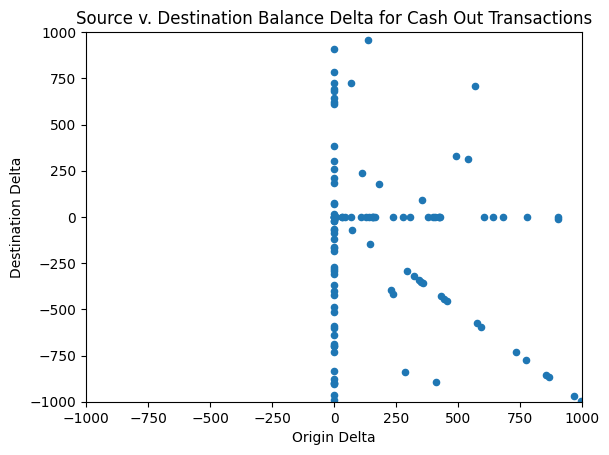

In [ ]:
def visual_2(df):
    def query(df):
        df['Origin Delta'] = df['oldbalanceOrg'] -	df['newbalanceOrig']
        df['Destination Delta'] = df['oldbalanceDest'] -	df['newbalanceDest']
        return df[df['type']=='CASH_OUT']
    plot = query(df).plot.scatter(x='Origin Delta',y='Destination Delta')
    plot.set_title('Source v. Destination Balance Delta for Cash Out Transactions')
    plot.set_xlim(left=-1e3, right=1e3)
    plot.set_ylim(bottom=-1e3, top=1e3)
    return 'A cash out occurs when a partipant withdraws money. It is reassuring '\
           'that only two of the four quadrants have activity, as the contrary '\
           'would indicate something wrong with the dataset. The y=-x line is '\
           'particularly interesting as it indicates instant settlement.'

visual_2(df)


'Here we see that the fraud detection at play misses almost all of the fradulent activity. However, there are no false negatives either. One interpretation could be that the detector does not report until it has a high degree of confidence.'

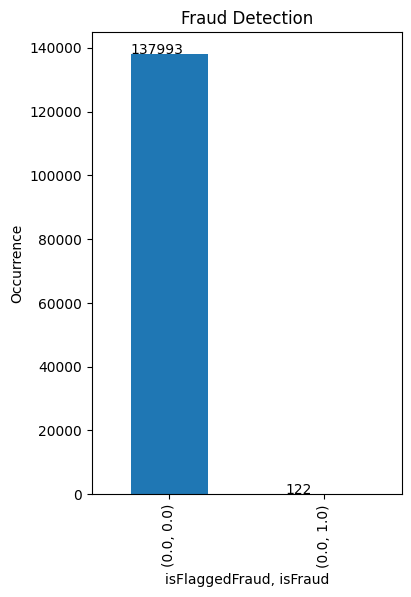

In [ ]:
def exercise_custom(df):
    return df[['isFlaggedFraud', 'isFraud']].value_counts()

def visual_custom(df):
    fig, ax = plt.subplots(1, figsize=(4,6))
    exercise_custom(df).plot(ax=ax, kind='bar')
    ax.set_title('Fraud Detection')
    ax.set_xlabel('isFlaggedFraud, isFraud')
    ax.set_ylabel('Occurrence')
    for p in ax.patches:
        ax.annotate(p.get_height(), (p.get_x(), p.get_height()))

    return "Here we see that the fraud detection at play misses almost all "\
           "of the fradulent activity. However, there are no false negatives "\
           "either. One interpretation could be that the detector does not "\
           "report until it has a high degree of confidence."

visual_custom(df)
